# Final Project

The project questions and data are from: https://www.udemy.com/course/python-pandas/

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `STORE_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../project_data/project_transactions.csv")[["household_key", "STORE_ID", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]]

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   STORE_ID       int64  
 2   BASKET_ID      int64  
 3   DAY            int64  
 4   PRODUCT_ID     int64  
 5   QUANTITY       int64  
 6   SALES_VALUE    float64
dtypes: float64(1), int64(6)
memory usage: 114.6 MB


In [4]:
df.describe().round()

,household_key,STORE_ID,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3268.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,9122.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,330.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,372.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,422.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,34280.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [5]:
for col in ["household_key", "STORE_ID"]:
    df[col] = df[col].astype({col: "int32"})
df["DAY"] = df["DAY"].astype({"DAY": "int16"})


In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int32  
 1   STORE_ID       int32  
 2   BASKET_ID      int64  
 3   DAY            int16  
 4   PRODUCT_ID     int64  
 5   QUANTITY       int64  
 6   SALES_VALUE    float64
dtypes: float64(1), int16(1), int32(2), int64(3)
memory usage: 86.0 MB


In [7]:
# Use the following snippet to create a Date Column.

df = (
    df
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(df["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [8]:
df.set_index("date", inplace = True)
df.head()

,household_key,STORE_ID,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
date,,,,,,
2016-01-01,1364,31742,26984896261,842930,1,2.19
2016-01-01,1364,31742,26984896261,897044,1,2.99
2016-01-01,1364,31742,26984896261,920955,1,3.09
2016-01-01,1364,31742,26984896261,937406,1,2.50
2016-01-01,1364,31742,26984896261,981760,1,0.60


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<AxesSubplot:title={'center':'Sum Sales by Month'}, xlabel='date'>

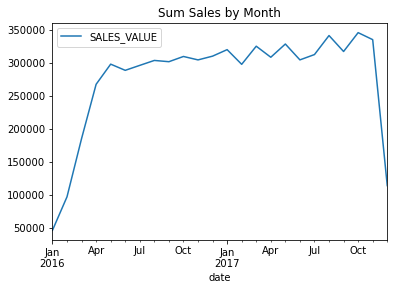

In [9]:
# Plot the sum of sales by month. Are sales growing over time?
df[["SALES_VALUE"]].resample("M").sum().plot(title = "Sum Sales by Month")

<AxesSubplot:title={'center':'Sum Sales by April 2-16 - October 2017'}, xlabel='date'>

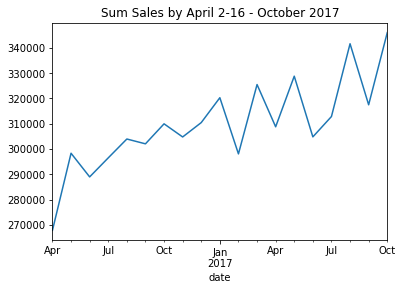

In [10]:
df.loc["2016-04-01":"2017-10-31", "SALES_VALUE"].resample("M").sum().plot(title = "Sum Sales by April 2-16 - October 2017")

In [11]:
df_month_sales = df.groupby([df.index.year, df.index.month])[["SALES_VALUE"]].sum()
df_month_sales

SALES_VALUE
date date             
2016 1        46557.97
     2        97315.16
     3       185521.82
     4       267801.38
     5       298319.14
     6       288952.45
     7       296488.02
     8       303951.35
     9       302040.56
     10      309962.42
     11      304764.41
     12      310456.27
2017 1       320301.20
     2       298058.26
     3       325511.23
     4       308786.99
     5       328829.68
     6       304792.96
     7       312853.52
     8       341670.16
     9       317498.59
     10      346065.23
     11      335458.18
     12      114286.55

In [12]:
df_month_sales.loc[2017][["SALES_VALUE"]]

,SALES_VALUE
date,
1,320301.20
2,298058.26
3,325511.23
4,308786.99
5,328829.68
6,304792.96
7,312853.52
8,341670.16
9,317498.59


In [13]:
df_month_sales_year_cols = df_month_sales.loc[2016].reset_index().rename(columns={"date": "Month", "SALES_VALUE": "2016_SALES"})
df_month_sales_year_cols["2017_SALES"] = df_month_sales.loc[2017][["SALES_VALUE"]].reset_index().rename(columns={"SALES_VALUE":"2017_SALES"})["2017_SALES"]
df_month_sales_year_cols

,Month,2016_SALES,2017_SALES
0,1,46557.97,320301.20
1,2,97315.16,298058.26
2,3,185521.82,325511.23
3,4,267801.38,308786.99
4,5,298319.14,328829.68
5,6,288952.45,304792.96
6,7,296488.02,312853.52
7,8,303951.35,341670.16
8,9,302040.56,317498.59
9,10,309962.42,346065.23


<AxesSubplot:title={'center':'Monthly Sales in 2016 vs Monthly Sales 2017'}>

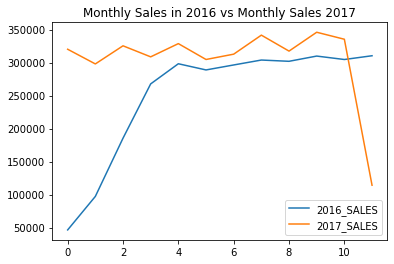

In [14]:
df_month_sales_year_cols[["2016_SALES", "2017_SALES"]].plot(title="Monthly Sales in 2016 vs Monthly Sales 2017")

<AxesSubplot:title={'center':'Sales by day of week'}, xlabel='date'>

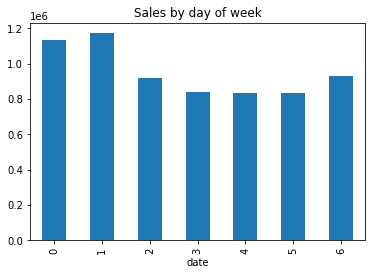

In [15]:
df.groupby(df.index.dayofweek)["SALES_VALUE"].sum().plot(kind = "bar", title = "Sales by day of week")

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [16]:
df_demo = pd.read_csv("../project_data/hh_demographic.csv")[["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]]

In [17]:
df_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE_DESC       801 non-null    object
 1   INCOME_DESC    801 non-null    object
 2   household_key  801 non-null    int64 
 3   HH_COMP_DESC   801 non-null    object
dtypes: int64(1), object(3)
memory usage: 159.3 KB


In [18]:
df_demo.describe().round()

,household_key
count,801.0
mean,1235.0
std,737.0
min,1.0
25%,596.0
50%,1218.0
75%,1914.0
max,2499.0


In [19]:
df_demo["household_key"] = df_demo["household_key"].astype({"household_key": "int16"})

In [20]:
df_demo.nunique()

AGE_DESC           6
INCOME_DESC       12
household_key    801
HH_COMP_DESC       6
dtype: int64

In [21]:
for col in ["AGE_DESC", "INCOME_DESC"]:
    df_demo[col].astype('category')


In [22]:
df_demo["AGE_DESC"].unique()

array(['65+', '45-54', '25-34', '35-44', '19-24', '55-64'], dtype=object)

In [23]:
# Need to read more into setting category levels in pandas
age_cat_order = {'19-24':0, '25-34':1,'35-44':2,'45-54':3,'55-64':4,'65+':5}


In [24]:
df_demo["INCOME_DESC"].unique()

array(['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K'],
      dtype=object)

In [25]:
# Need to read more into setting category levels in pandas
income_cat_order = {'Under 15K':0, '15-24K':1, '25-34K':2, '35-49K':3, '50-74K':4, '75-99K':5, '100-124K': 6, '125-149K': 7, '150-174K': 8, '175-199K':9, '200-249K':10}


In [26]:
df_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE_DESC       801 non-null    object
 1   INCOME_DESC    801 non-null    object
 2   household_key  801 non-null    int16 
 3   HH_COMP_DESC   801 non-null    object
dtypes: int16(1), object(3)
memory usage: 154.6 KB


In [27]:
df_demo.isna().sum()

AGE_DESC         0
INCOME_DESC      0
household_key    0
HH_COMP_DESC     0
dtype: int64

In [28]:
df_demo.head()

,AGE_DESC,INCOME_DESC,household_key,HH_COMP_DESC
0,65+,35-49K,1,2 Adults No Kids
1,45-54,50-74K,7,2 Adults No Kids
2,25-34,25-34K,8,2 Adults Kids
3,25-34,75-99K,13,2 Adults Kids
4,45-54,50-74K,16,Single Female


In [29]:
# Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.
df_sales_by_house = df.groupby("household_key")[["SALES_VALUE"]].sum()
df_sales_by_house

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [30]:
# join the demographics DataFrame to the aggregated transactions table. 
# Since we're interested in analyzing the demographic data we have, 
# make sure not to include rows from transactions that don't match.
merged_df = df_demo.merge(df_sales_by_house, on='household_key', how = "inner")

merged_df

,AGE_DESC,INCOME_DESC,household_key,HH_COMP_DESC,SALES_VALUE
0,65+,35-49K,1,2 Adults No Kids,4330.16
1,45-54,50-74K,7,2 Adults No Kids,3400.05
2,25-34,25-34K,8,2 Adults Kids,5534.97
3,25-34,75-99K,13,2 Adults Kids,13190.92
4,45-54,50-74K,16,Single Female,1512.02
...,...,...,...,...,...
663,45-54,100-124K,2087,Unknown,7832.74
664,25-34,35-49K,2088,Single Female,4905.71
665,35-44,Under 15K,2092,1 Adult Kids,2290.54
666,45-54,50-74K,2094,2 Adults No Kids,3055.52


<AxesSubplot:title={'center':'Sales by AGE'}, xlabel='AGE_DESC'>

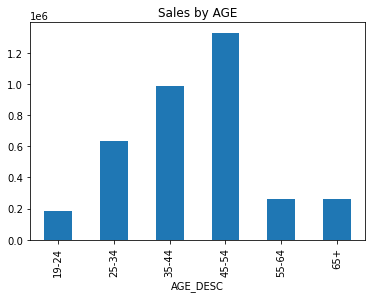

In [66]:
#Plot the sum of sales by age_desc and income_desc (in separate charts).
merged_df.groupby(["AGE_DESC"])["SALES_VALUE"].sum().plot(kind = "bar", title = "Sales by AGE")

<AxesSubplot:title={'center':'Sales by income'}, xlabel='INCOME_DESC'>

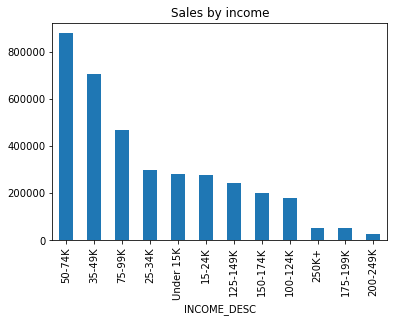

In [37]:
merged_df.groupby(["INCOME_DESC"])["SALES_VALUE"].sum().sort_values(ascending = False).plot(kind = "bar", title = "Sales by income")

In [56]:
#Then, create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. 
# Which of our demographics have the highest average sales?

merged_df_pivot = merged_df.pivot_table(index = 'AGE_DESC', columns = 'HH_COMP_DESC', values = 'SALES_VALUE', aggfunc = 'mean')
merged_df_pivot.style.background_gradient(cmap="RdYlGn", axis=None)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [46]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

df_product = pd.read_csv('../project_data/product.csv',
                     usecols=product_cols,
                     dtype=product_dtypes
                     )

In [47]:
df_product.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [52]:
df_product_merged = df.merge(df_product, on = "PRODUCT_ID", how = "inner").merge(df_demo, on = "household_key", how = "inner")
df_product_merged.head()

,household_key,STORE_ID,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DEPARTMENT,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1364,31742,26984896261,842930,1,2.19,GROCERY,65+,100-124K,Single Female
1,1364,31742,26984896261,897044,1,2.99,GROCERY,65+,100-124K,Single Female
2,1364,31742,32305198058,897044,1,2.99,GROCERY,65+,100-124K,Single Female
3,1364,31742,35665305476,897044,1,2.99,GROCERY,65+,100-124K,Single Female
4,1364,31742,26984896261,920955,1,3.09,MEAT,65+,100-124K,Single Female


In [68]:
df_product_merged_pivot = df_product_merged.pivot_table(index = 'DEPARTMENT' , columns = 'AGE_DESC', values = "SALES_VALUE", aggfunc = "sum")
df_product_merged_pivot.style.background_gradient(cmap="RdYlGn", axis=1)

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,nan,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,nan,nan,6.980000,1.560000,nan,3.310000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [73]:
writer = pd.ExcelWriter('./product_pivot.xlsx')
df_product_merged_pivot.to_excel(writer, 'data_sheet')
writer.save()

In [74]:
# Test the dataframe saved to excel
excel_pf = pd.read_excel('./product_pivot.xlsx')
excel_pf

,DEPARTMENT,19-24,25-34,35-44,45-54,55-64,65+
0,,0.00,0.00,0.00,0.00,0.00,0.00
1,AUTOMOTIVE,11.64,21.25,72.58,55.92,NaN,16.37
2,CHEF SHOPPE,81.30,134.16,348.53,418.24,80.86,149.24
3,CNTRL/STORE SUP,2.00,0.00,1.00,9.95,2.00,0.10
4,COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.90
5,COUP/STR & MFG,7.49,48.42,121.20,154.55,40.68,20.49
6,DAIRY DELI,3.80,3.85,7.39,16.75,3.14,1.94
7,DELI,4043.30,18181.94,34577.29,44334.22,9850.54,10462.33
8,DELI/SNACK BAR,NaN,NaN,6.98,1.56,NaN,3.31
9,DRUG GM,25297.43,85298.05,126480.34,177007.13,29220.93,32759.76
